# HOUSE PRICE PREDICTION PROJECT

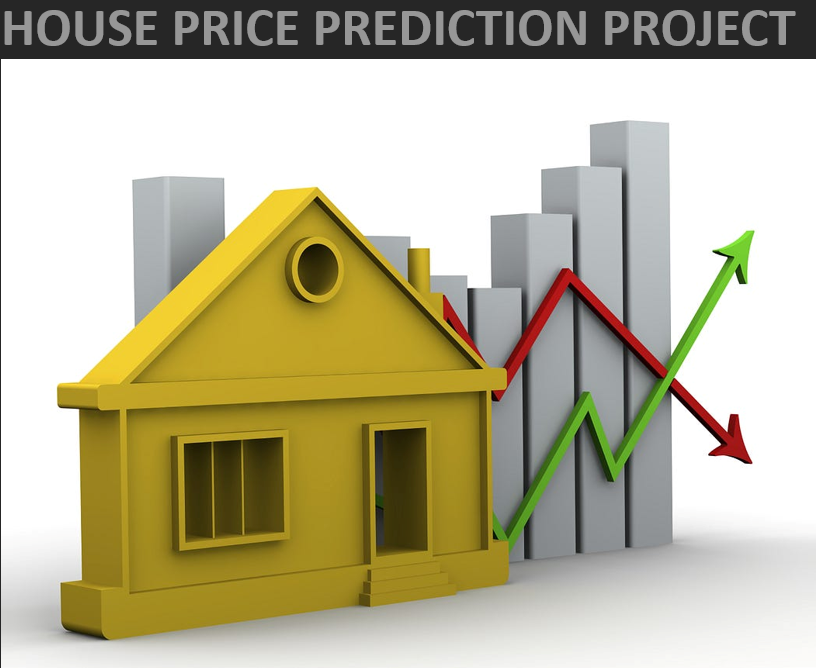

**INTRODUCTION ABOUT THE PROJECT**

Welcome to the House Price Prediction Challenge, you will test your regression skills by designing an algorithm to accurately predict the house prices in India. Accurately predicting house prices can be a daunting task. The buyers are just not concerned about the size(square feet) of the house and there are various other factors that play a key role to decide the price of a house/property. It can be extremely difficult to figure out the right set of attributes that are contributing to understanding the buyer's behavior as such. This dataset has been collected across various property aggregators across India. In this competition, provided the 12 influencing factors your role as a data scientist is to predict the prices as accurately as possible.

Also, in this competition, you will get a lot of room for feature engineering and mastering advanced regression techniques such as Random Forest, Deep Neural Nets, and various other ensembling techniques.

**IMPORTING ALL LIBRARIES**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

**LOADING THE DATA**

In [2]:
csv_url1 = r"C:\Users\ASHUTOSH YADAV\OneDrive\Desktop\DATASET\msc_training_dataset.csv"
csv_url2 = r"C:\Users\ASHUTOSH YADAV\OneDrive\Desktop\DATASET\msc_testing_dataset.csv"

train = pd.read_csv(csv_url1)
test = pd.read_csv(csv_url2)

In [3]:
train

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,1,2,1,1,0,0,1,0,0,0,4825
2996,1,1,2,3,0,1,1,0,0,1,1,6755
2997,2,2,1,2,0,0,1,1,1,0,0,7565
2998,4,1,1,2,1,1,1,0,0,0,1,9135


In [4]:
test

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178
...,...,...,...,...,...,...,...,...,...,...,...,...
994,5,2,2,3,1,1,0,0,0,0,0,10088
995,5,1,2,3,1,1,0,0,0,0,0,9788
996,3,2,2,1,0,1,1,1,0,1,0,9388
997,3,2,1,1,1,0,0,1,1,0,0,8528


In [5]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [6]:
train.shape

(3000, 12)

In [7]:
train.columns

Index(['room', 'bathroom', 'kitchen', 'french_door', 'backyard', 'furnished',
       'green_paint', 'solar_power', 'woodfloor', 'qlm_security',
       'club_access', 'price'],
      dtype='object')

In [8]:
# check null value from each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB


In [9]:
# check the data type of column
train.dtypes

room            int64
bathroom        int64
kitchen         int64
french_door     int64
backyard        int64
furnished       int64
green_paint     int64
solar_power     int64
woodfloor       int64
qlm_security    int64
club_access     int64
price           int64
dtype: object

In [10]:
# check the uniqueness of data
train.nunique()

room              5
bathroom          2
kitchen           2
french_door       3
backyard          2
furnished         2
green_paint       2
solar_power       2
woodfloor         2
qlm_security      2
club_access       2
price           856
dtype: int64

In [11]:
# checking the duplicate values in column
train.duplicated().sum()

np.int64(488)

In [12]:
# how to delete duplicate rows from table
train.drop_duplicates(inplace=True)

In [13]:
train.duplicated().sum()

np.int64(0)

In [14]:
train.shape

(2512, 12)

In [15]:
# show complete info of data set
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, 0 to 2998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          2512 non-null   int64
 1   bathroom      2512 non-null   int64
 2   kitchen       2512 non-null   int64
 3   french_door   2512 non-null   int64
 4   backyard      2512 non-null   int64
 5   furnished     2512 non-null   int64
 6   green_paint   2512 non-null   int64
 7   solar_power   2512 non-null   int64
 8   woodfloor     2512 non-null   int64
 9   qlm_security  2512 non-null   int64
 10  club_access   2512 non-null   int64
 11  price         2512 non-null   int64
dtypes: int64(12)
memory usage: 255.1 KB


In [16]:
# describe the data, describe the statistics, five-number summary
train.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.00000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,2.991242,1.495223,1.510748,2.001194,0.49164,0.492834,0.490446,0.493232,0.508758,0.486863,0.501194,8609.211783
std,1.424568,0.500077,0.499984,0.813809,0.50003,0.500048,0.500008,0.500054,0.500023,0.499927,0.500098,2222.006893
min,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10197.500000
max,5.000000,2.000000,2.000000,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


In [17]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105
5,5,1,2,1,0,0,1,0,1,0,0,8995


In [18]:
train.sample(2)

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
1825,4,1,1,2,0,1,0,1,0,0,1,9735
1649,5,1,2,2,1,1,0,1,0,1,1,12235


In [19]:
pie = train.groupby('bathroom')['price'].mean().reset_index()
pie

,bathroom,price
0,1,8483.698738
1,2,8737.146302


# EDA (Exploratory Data Analysis)

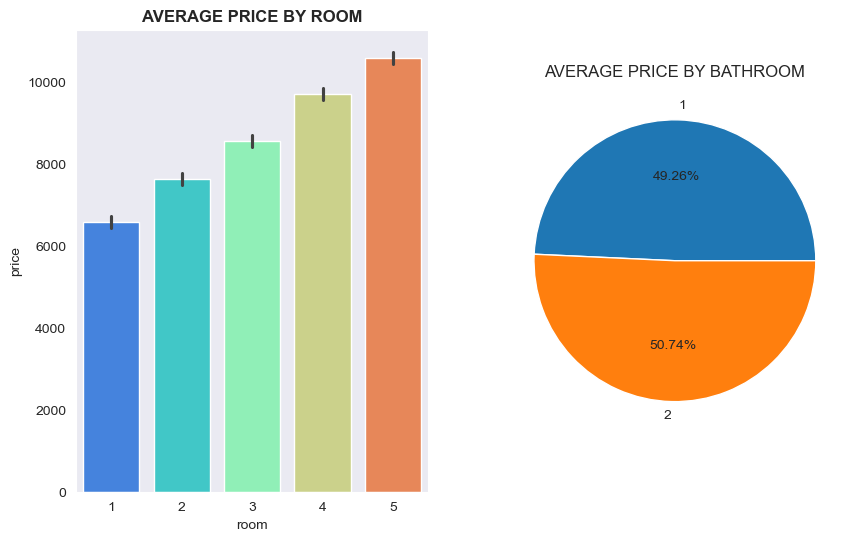

In [20]:
sns.set_style('dark')

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(data=train,x='room',y='price',palette='rainbow')
plt.title('AVERAGE PRICE BY ROOM',fontweight='bold')

plt.subplot(1,2,2)
plt.pie(pie['price'],labels=pie['bathroom'],autopct="%0.2f%%")
plt.title('AVERAGE PRICE BY BATHROOM')

plt.show()

**INSIGHTS:** 
1. with the help of the column chart we can see the average maximum price of a house dependency on number of rooms
2. 

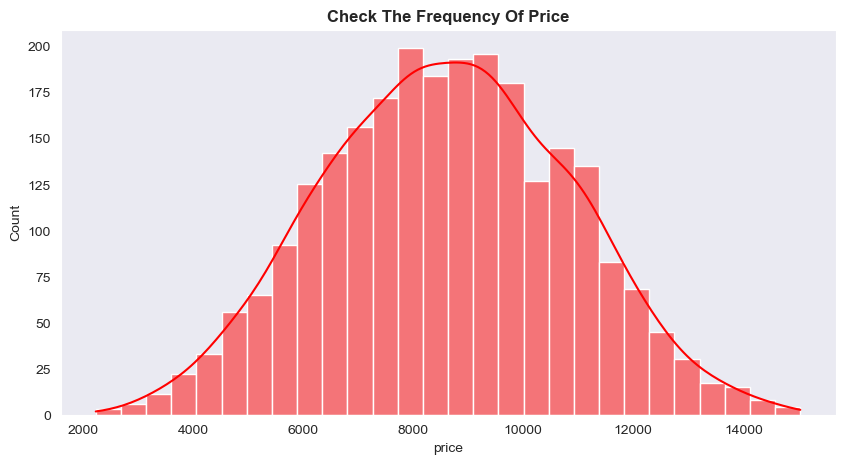

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(data=train,x='price',kde=1,color='red')
plt.title('Check The Frequency Of Price',fontweight='bold')
plt.show()

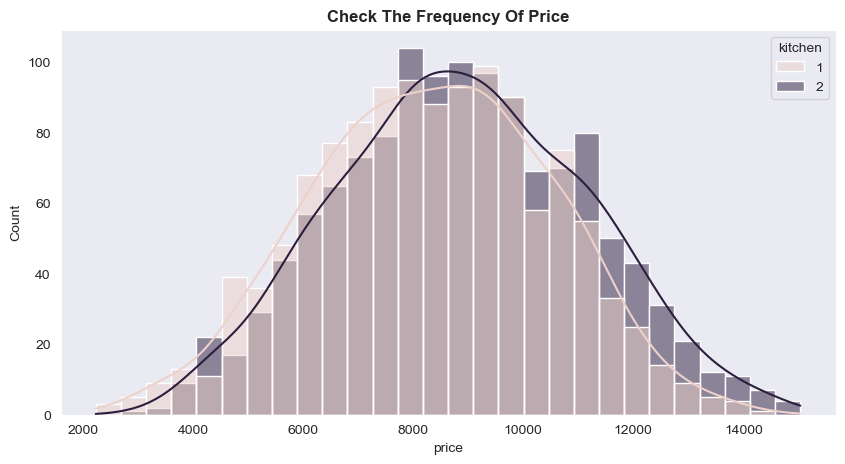

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(data=train,x='price',kde=1,hue='kitchen',color='viridis')
plt.title('Check The Frequency Of Price',fontweight='bold')
plt.show()

In [23]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105
5,5,1,2,1,0,0,1,0,1,0,0,8995


In [24]:
train.nunique().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11
index,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,5,2,2,3,2,2,2,2,2,2,2,856


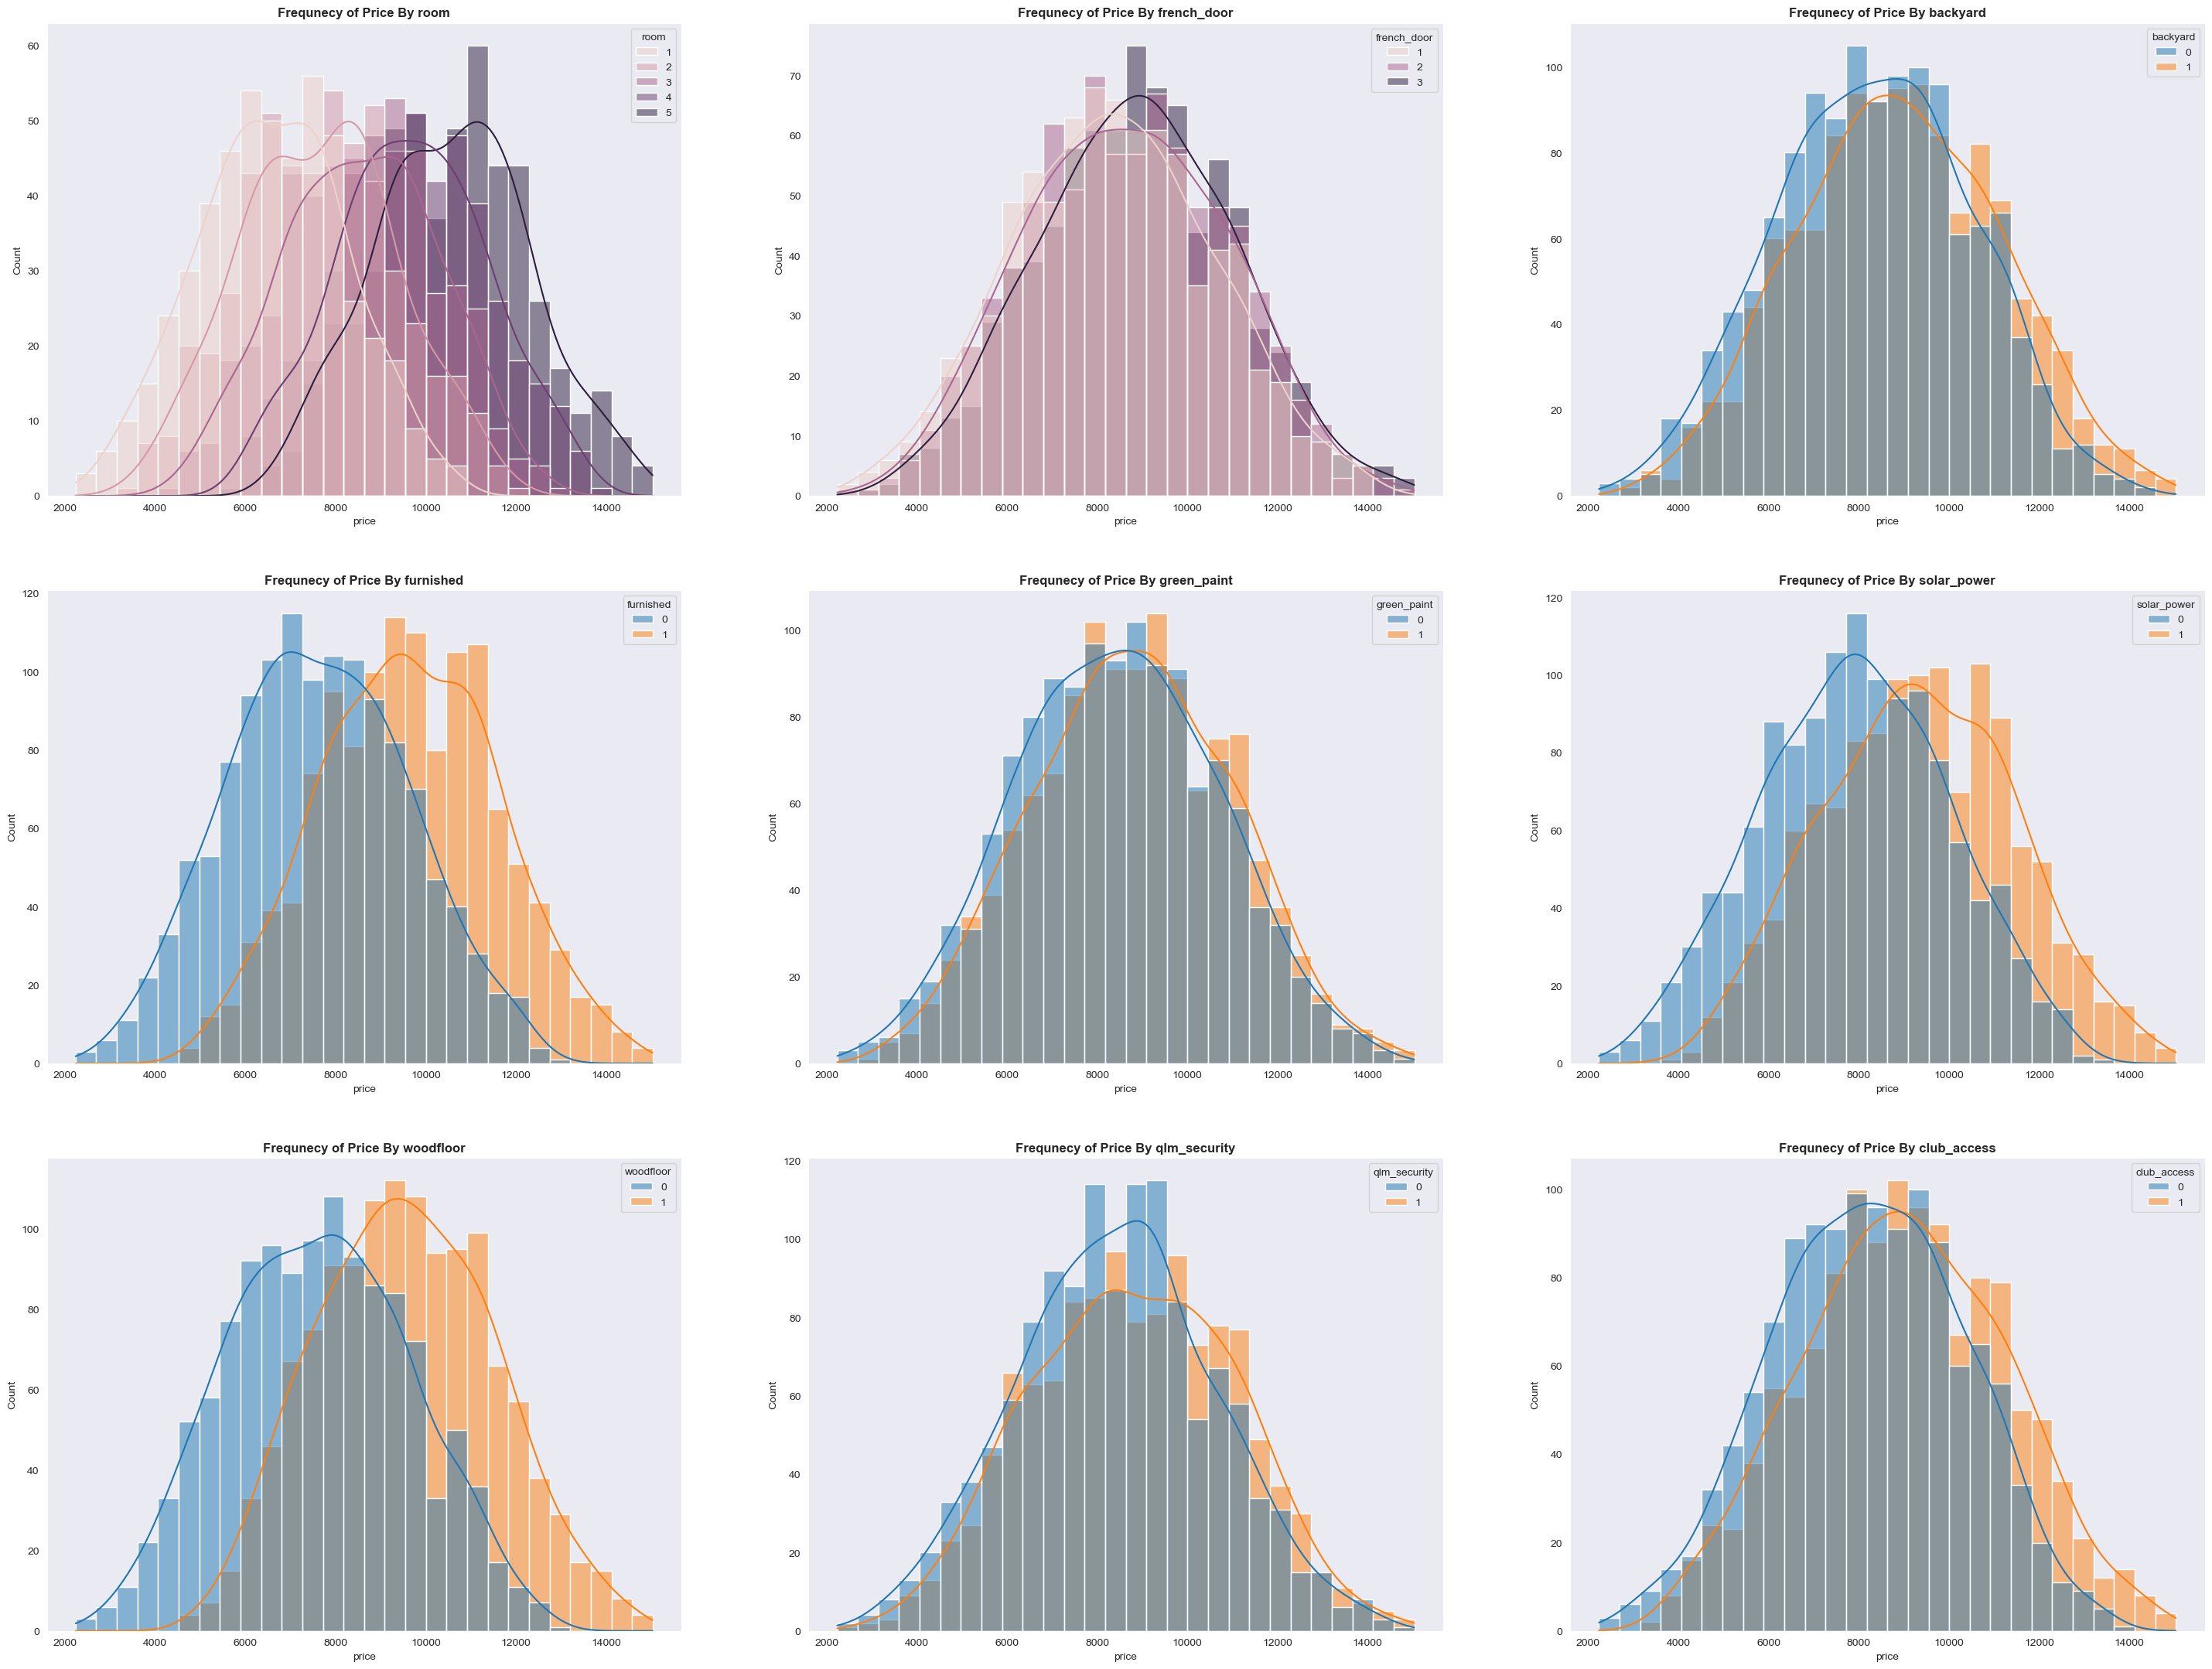

In [25]:
plt.figure(figsize=(36,27))
c = 1
for i in train:
    if i in ('bathroom','kitchen','price'):
        continue
    else:
        plt.subplot(3,3,c)
        sns.histplot(data=train,x='price',hue=i,kde=1)
        plt.title(f'Frequnecy of Price By {i}',fontweight='bold')
        c += 1
plt.show()

In [26]:
train.shape

(2512, 12)

In [27]:
train.head(3)

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105


In [28]:
for i in train:
    if i == 'price':
        continue
    else:
        print('-'*40)
        val =  train[i].value_counts().reset_index()
        print(val)
        print('-'*40)

----------------------------------------
   room  count
0     2    517
1     5    515
2     1    509
3     3    488
4     4    483
----------------------------------------
----------------------------------------
   bathroom  count
0         1   1268
1         2   1244
----------------------------------------
----------------------------------------
   kitchen  count
0        2   1283
1        1   1229
----------------------------------------
----------------------------------------
   french_door  count
0            2    849
1            3    833
2            1    830
----------------------------------------
----------------------------------------
   backyard  count
0         0   1277
1         1   1235
----------------------------------------
----------------------------------------
   furnished  count
0          0   1274
1          1   1238
----------------------------------------
----------------------------------------
   green_paint  count
0            0   1280
1            1   

In [29]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105
5,5,1,2,1,0,0,1,0,1,0,0,8995


In [30]:
train.corr()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
room,1.000000,0.007768,0.010197,0.009971,-0.005135,0.004384,-0.026955,-0.014619,0.015203,-0.016937,0.014549,0.644894
bathroom,0.007768,1.000000,-0.014926,0.000503,-0.002549,-0.004915,0.023708,-0.021629,-0.003018,-0.023349,-0.013513,0.057040
kitchen,0.010197,-0.014926,1.000000,-0.016181,0.000360,0.009069,-0.017909,0.006663,-0.005952,0.024464,0.006320,0.122473
french_door,0.009971,0.000503,-0.016181,1.000000,-0.007315,0.003446,0.004432,0.009317,0.008293,-0.022965,-0.008321,0.096599
backyard,-0.005135,-0.002549,0.000360,-0.007315,1.000000,0.000557,0.000477,0.002959,0.013832,-0.021150,-0.023849,0.123133
furnished,0.004384,-0.004915,0.009069,0.003446,0.000557,1.000000,0.044325,-0.016917,0.001844,-0.021883,0.019941,0.453719
green_paint,-0.026955,0.023708,-0.017909,0.004432,0.000477,0.044325,1.000000,-0.005833,-0.006037,0.000294,-0.008714,0.079985
solar_power,-0.014619,-0.021629,0.006663,0.009317,0.002959,-0.016917,-0.005833,1.000000,-0.013301,0.002830,-0.006338,0.320911
woodfloor,0.015203,-0.003018,-0.005952,0.008293,0.013832,0.001844,-0.006037,-0.013301,1.000000,0.026747,0.002347,0.435437
qlm_security,-0.016937,-0.023349,0.024464,-0.022965,-0.021150,-0.021883,0.000294,0.002830,0.026747,1.000000,0.020771,0.090566


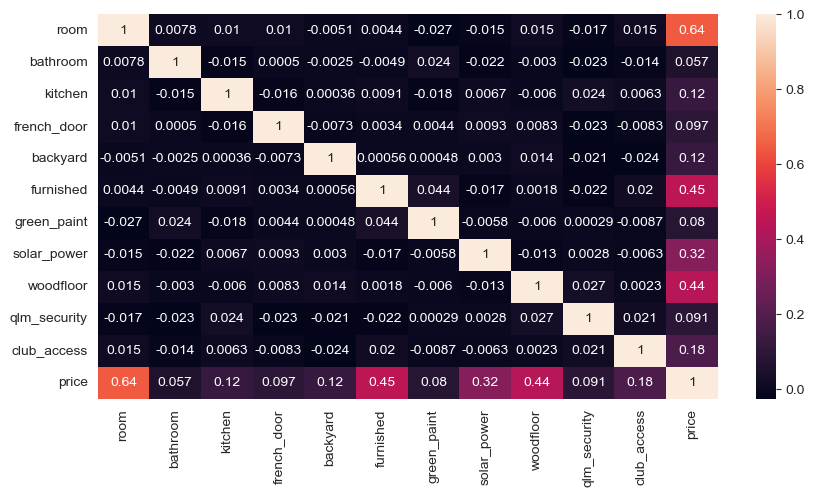

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(),annot=True)
plt.show()

# linear regression

In [32]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105
5,5,1,2,1,0,0,1,0,1,0,0,8995


In [33]:
x_train = train.drop(columns = 'price')
y_train = train[['price']]

In [34]:
x_train

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access
0,3,1,2,1,1,0,1,0,0,1,1
1,5,2,2,2,1,0,0,0,0,1,1
3,1,2,1,2,0,0,0,0,1,1,0
4,2,1,2,3,1,1,0,0,1,1,0
5,5,1,2,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2993,2,1,1,3,0,0,1,0,0,0,1
2995,1,1,2,1,1,0,0,1,0,0,0
2996,1,1,2,3,0,1,1,0,0,1,1
2997,2,2,1,2,0,0,1,1,1,0,0


In [35]:
y_train

,price
0,6835
1,9005
3,5105
4,9105
5,8995
...,...
2993,4815
2995,4825
2996,6755
2997,7565


In [36]:
x_train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access
0,3,1,2,1,1,0,1,0,0,1,1
1,5,2,2,2,1,0,0,0,0,1,1
3,1,2,1,2,0,0,0,0,1,1,0
4,2,1,2,3,1,1,0,0,1,1,0
5,5,1,2,1,0,0,1,0,1,0,0


In [37]:
y_train.head()

,price
0,6835
1,9005
3,5105
4,9105
5,8995


In [38]:
test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


In [39]:
x_test =  test.drop(columns = 'price')
y_test = test[['price']]

In [40]:
x_test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access
0,1,1,1,3,0,0,1,1,0,1,0
1,5,1,1,2,0,0,0,0,0,1,1
2,5,1,1,3,0,0,0,1,1,1,1
3,4,2,2,1,0,1,1,0,0,1,0
4,5,2,1,1,0,1,1,1,0,0,1


In [41]:
y_test.head()

,price
0,5068
1,7658
2,11318
3,8858
4,11178


# BUILDING THE MACHINE LEARNING ALGORITHMS

In [42]:
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [43]:
ac = linear.score(x_train,y_train)
print(f'Accuracy Of Training Dataset : {ac}')

Accuracy Of Training Dataset : 1.0


In [44]:
ac2 = linear.score(x_test,y_test)
print(f'Accuracy Of Testing Dataset : {ac2}')

Accuracy Of Testing Dataset : 0.9999656095212318


In [45]:
pred = linear.predict(x_test)
pred.T

array([[ 5055.,  7645., 11305.,  8845., 11165., 11375., 11735.,  6835.,
         7815.,  5895.,  9095.,  8295.,  6695., 11305.,  7205.,  9165.,
         8775., 12745.,  9745.,  6655.,  9325.,  7785.,  7075.,  4315.,
         9965.,  6855.,  7335.,  8895.,  6325.,  9695.,  6645., 10305.,
        10485.,  8195.,  7565., 10355.,  9475., 11115.,  9765., 12825.,
         6295.,  5125.,  9825.,  8895., 11715.,  6205.,  4095., 11475.,
         9565.,  5535., 11455., 10395.,  4125.,  7735., 13055.,  9595.,
         6445.,  8365., 10155.,  7835.,  8275., 14305.,  7075.,  8435.,
        12625.,  7095., 11435., 10555., 10095.,  5535.,  8235., 12095.,
         4215.,  5865.,  9355.,  9245.,  7065., 11625., 10855., 10825.,
         8785.,  7355., 11865.,  8315., 11805.,  5945.,  8775.,  8275.,
         7165.,  8245.,  7575., 11925., 11965.,  7975.,  6645., 10795.,
        11235.,  8195.,  9355.,  7445.,  7235.,  8935.,  4575.,  9675.,
         5735.,  5075., 10645.,  9705.,  8605., 12515.,  8165., 